In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,10)
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import os
os.getcwd()
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [3]:
dataset=pd.read_csv('indian_liver_patient.csv')
dataset.head().transpose()

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [4]:
list(dataset.columns)

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [5]:
dataset.shape

(583, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1})

In [8]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:>

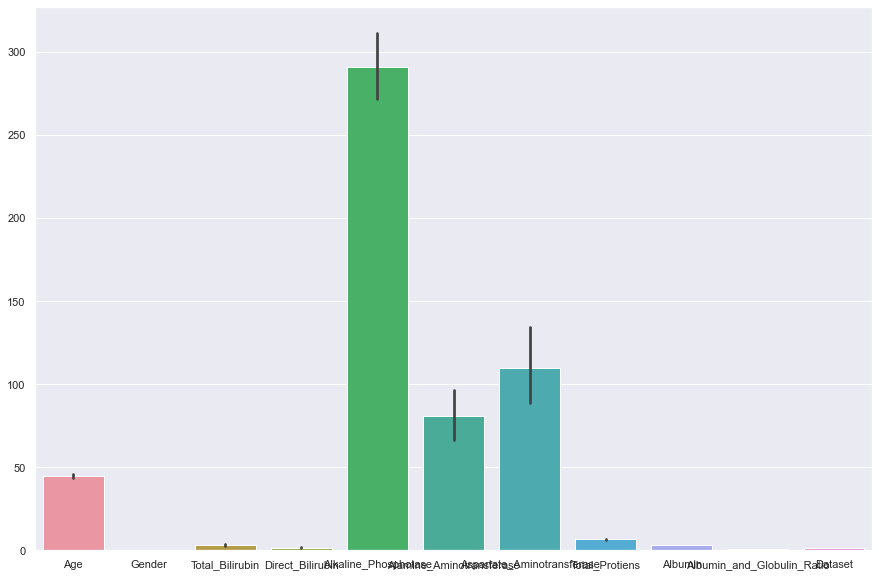

In [9]:
sns.barplot(dataset)

In [10]:
dataset['Age'].value_counts(ascending=True)

90     1
67     1
11     1
78     1
15     1
10     1
85     1
8      1
6      1
84     1
14     2
19     2
7      2
63     2
12     2
4      2
69     2
73     2
23     3
16     3
44     3
20     3
13     4
68     4
56     4
43     4
74     4
61     5
24     5
25     5
17     5
41     5
53     6
39     6
64     6
47     6
27     6
57     7
29     7
52     7
21     7
54     8
72     8
28     8
34     8
31     8
22     9
37     9
70     9
62     9
30    10
51    10
36    11
49    11
18    11
66    12
35    12
75    14
58    14
26    14
33    15
46    16
65    17
40    17
55    18
32    20
48    20
38    21
42    21
50    23
45    25
60    34
Name: Age, dtype: int64

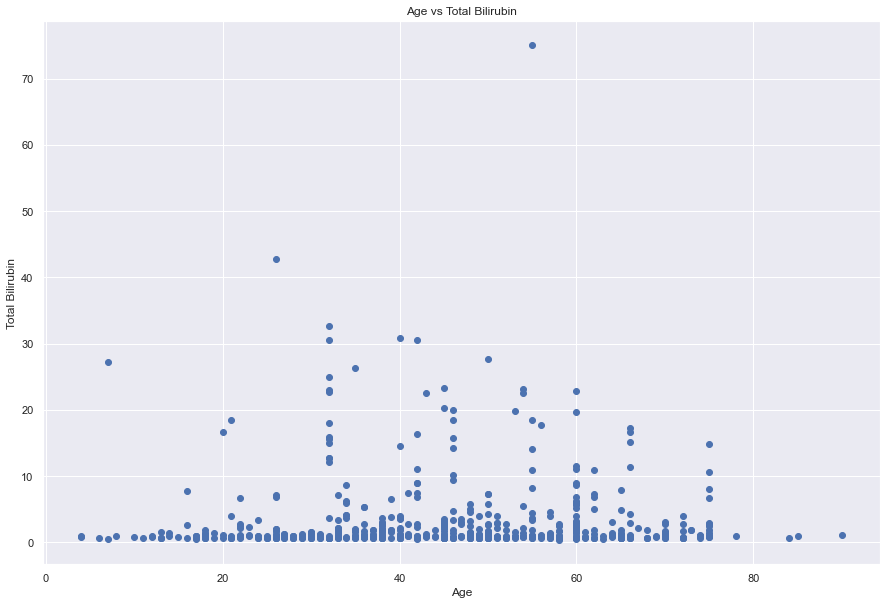

In [11]:
#  total bilirubin Range are 1.2 milligrams per deciliter (mg/dL)
plt.scatter(dataset.Age,dataset.Total_Bilirubin)
plt.title("Age vs Total Bilirubin")
plt.xlabel("Age")
plt.ylabel("Total Bilirubin")
plt.show()

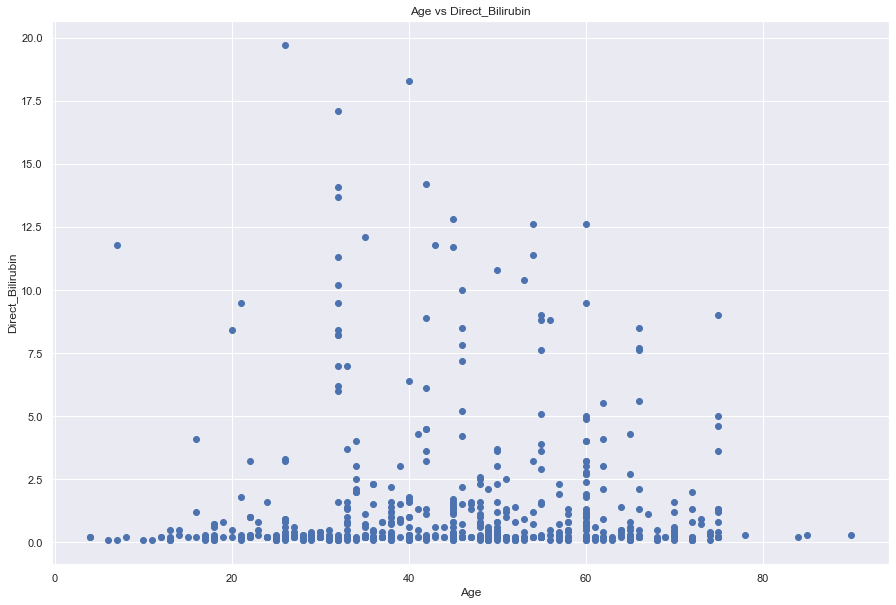

In [12]:
# Normal range of direct bilirubin for adults is 0.3
plt.scatter(dataset.Age,dataset.Direct_Bilirubin)
plt.title("Age vs Direct_Bilirubin")
plt.xlabel("Age")
plt.ylabel("Direct_Bilirubin")
plt.show()

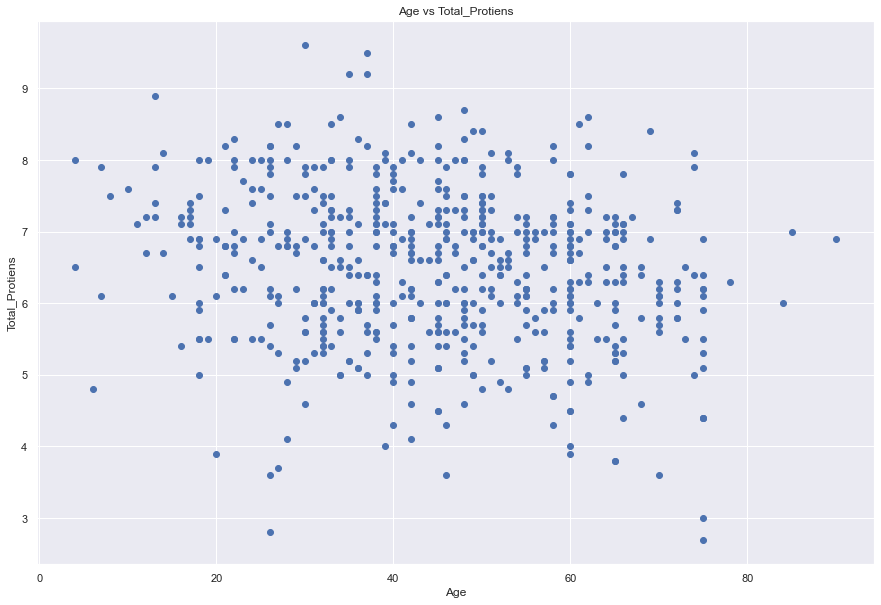

In [13]:
# the normal range of total Protein is 6 - 8.3  (g/dL) for adults
plt.scatter(dataset.Age,dataset.Total_Protiens)
plt.title("Age vs Total_Protiens")
plt.xlabel("Age")
plt.ylabel("Total_Protiens")
plt.show()

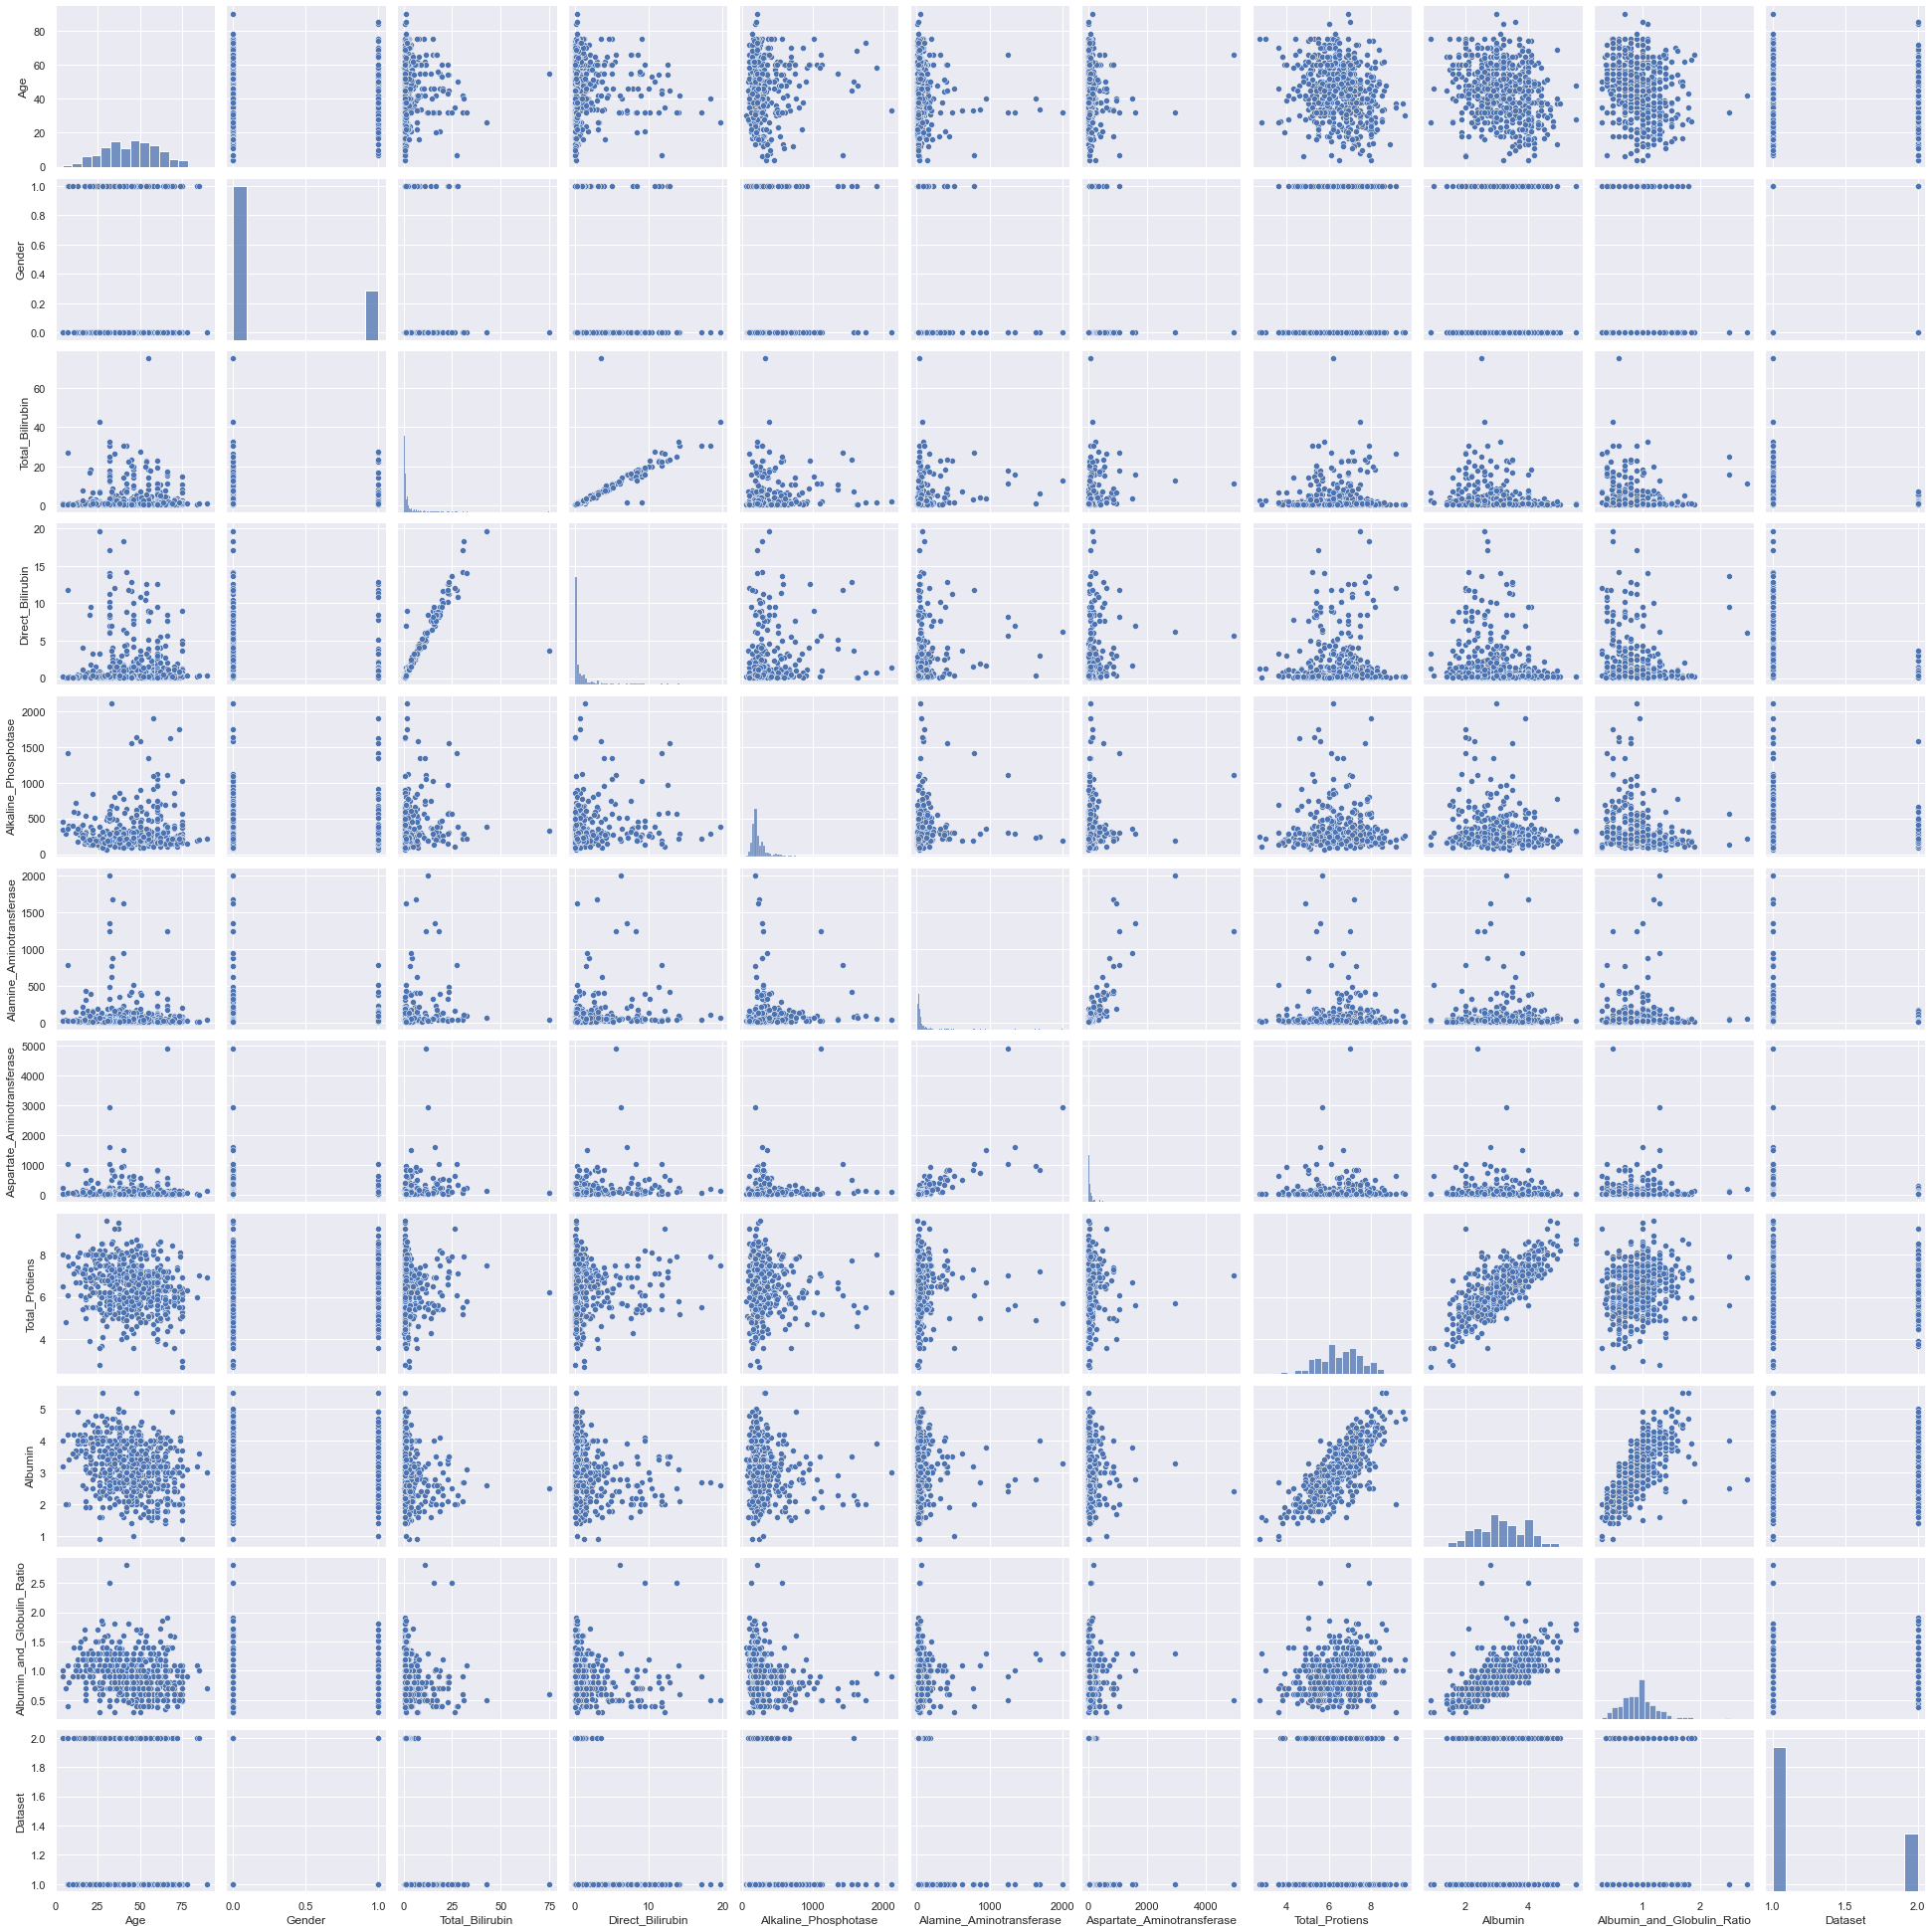

In [14]:
sns.pairplot(dataset)

<AxesSubplot:>

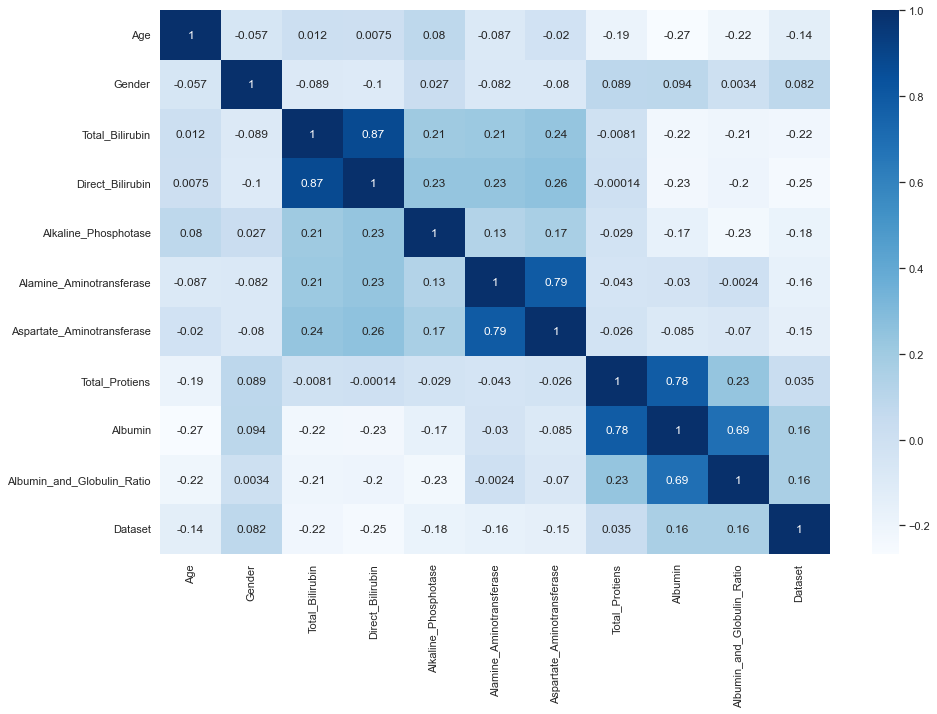

In [15]:
cor=dataset.corr()

sns.heatmap(cor,annot=True,cbar=True,cmap='Blues')

In [16]:
# total bilirubin Range are 1.2 milligrams per deciliter (mg/dL)
# Normal range of direct bilirubin for adults is 0.3
# Alkaline_Phosphotase normal range of total Protein is 6 - 8.3  (g/dL) for adults
# Alamine_Aminotransferase normal range is 44 to 147 international units per liter (IU/L) or 0.73 to 2.45 microkatal per liter (µkat/L)
# The normal range for adults is 4 to 36 U/L
# Aspartate_Aminotransferase normal range is 8 to 33 U/L
# Total protein normal range is 6.0 to 8.3 grams per deciliter (g/dL) or 60 to 83 g/L
# Albumin normal range is 3.4 to 5.4 g/dL (34 to 54 g/L
# Albumin_and_Globulin_Ratio and normal serum protein level is 6 to 8 g/dl. Albumin makes up 3.5 to 5.0 g/dl,

In [17]:
# Sorted data according to Age
dataset[['Age', 'Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
        'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']].sort_values('Age', ascending=False)[0:10]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
571,90,0,1.1,0.3,215,46,134,6.9,3.0,0.70
44,85,1,1.0,0.3,208,17,15,7.0,3.6,1.00
29,84,1,0.7,0.2,188,13,21,6.0,3.2,1.10
397,78,0,1.0,0.3,152,28,70,6.3,3.1,0.90
178,75,0,10.6,5.0,562,37,29,5.1,1.8,0.50
71,75,1,0.8,0.2,188,20,29,4.4,1.8,0.60
181,75,0,2.9,1.3,218,33,37,3.0,1.5,1.00
336,75,0,6.7,3.6,458,198,143,6.2,3.2,1.00
179,75,0,8.0,4.6,386,30,25,5.5,1.8,0.48
337,75,0,2.5,1.2,375,85,68,6.4,2.9,0.80


In [18]:
# Sorted data according to Gender
dataset[['Age', 'Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
        'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset']].sort_values('Gender', ascending=False)[0:10]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
525,53,1,0.9,0.2,210,35,32,8.0,3.9,0.90,2
383,60,1,1.4,0.7,159,10,12,4.9,2.5,1.00,2
486,42,1,0.8,0.2,195,18,15,6.7,3.0,0.80,1
123,64,1,0.8,0.2,178,17,18,6.3,3.1,0.90,1
485,22,1,6.7,3.2,850,154,248,6.2,2.8,0.80,1
128,58,1,1.7,0.8,1896,61,83,8.0,3.9,0.95,1
243,28,1,0.9,0.2,316,25,23,8.5,5.5,1.80,1
131,70,1,0.7,0.2,237,18,28,5.8,2.5,0.75,2
132,18,1,0.8,0.2,199,34,31,6.5,3.5,1.16,2


In [19]:
# Sorted data according to Age
dataset[['Age', 'Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
        'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset']].sort_values('Dataset', ascending=False)[0:10]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
291,60,0,0.7,0.2,174,32,14,7.8,4.2,1.10,2
131,70,1,0.7,0.2,237,18,28,5.8,2.5,0.75,2
281,50,0,0.7,0.2,192,18,15,7.4,4.2,1.30,2
283,18,0,1.3,0.7,316,10,21,6.0,2.1,0.50,2
287,43,0,1.3,0.6,155,15,20,8.0,4.0,1.00,2
293,23,0,1.1,0.5,191,37,41,7.7,4.3,1.20,2
297,25,1,0.9,0.3,159,24,25,6.9,4.4,1.70,2
299,24,1,0.9,0.2,195,40,35,7.4,4.1,1.20,2
300,58,0,0.8,0.2,180,32,25,8.2,4.4,1.10,2
303,50,0,0.7,0.2,206,18,17,8.4,4.2,1.00,2


In [20]:
# Sorted data according to Total_Bilirubin
dataset[['Age', 'Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
        'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset']].sort_values('Total_Bilirubin', ascending=False)[0:10]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
166,55,0,75.0,3.6,332,40,66,6.2,2.5,0.6,1
559,26,0,42.8,19.7,390,75,138,7.5,2.6,0.5,1
505,32,0,32.6,14.1,219,95,235,5.8,3.1,1.1,1
531,40,0,30.8,18.3,285,110,186,7.9,2.7,0.5,1
259,42,0,30.5,14.2,285,65,130,5.2,2.1,0.6,1
504,32,0,30.5,17.1,218,39,79,5.5,2.7,0.9,1
547,50,1,27.7,10.8,380,39,348,7.1,2.3,0.4,1
199,7,1,27.2,11.8,1420,790,1050,6.1,2.0,0.4,1
519,35,0,26.3,12.1,108,168,630,9.2,2.0,0.3,1
575,32,0,25.0,13.7,560,41,88,7.9,2.5,2.5,1


In [21]:
# Sorted data according to Total_Protiens
dataset[['Age', 'Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
        'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset']].sort_values('Total_Protiens', ascending=False)[0:10]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
273,30,0,0.7,0.2,262,15,18,9.6,4.7,1.2,1
270,37,0,0.7,0.2,235,96,54,9.5,4.9,1.0,1
519,35,0,26.3,12.1,108,168,630,9.2,2.0,0.3,1
510,37,1,0.8,0.2,205,31,36,9.2,4.6,1.0,2
335,13,1,0.7,0.1,182,24,19,8.9,4.9,1.2,1
372,48,0,0.7,0.2,326,29,17,8.7,5.5,1.7,1
520,62,0,1.8,0.9,224,69,155,8.6,4.0,0.8,1
286,34,1,0.8,0.2,192,15,12,8.6,4.7,1.2,1
290,45,1,1.0,0.3,250,48,44,8.6,4.3,1.0,1
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [22]:
# Sorted data according to Albumin_and_Globulin_Ratio
dataset[['Age', 'Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
        'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset']].sort_values('Albumin_and_Globulin_Ratio', ascending=False)[0:10]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
548,42,0,11.1,6.1,214,60,186,6.9,2.8,2.80,1
572,32,0,15.6,9.5,134,54,125,5.6,4.0,2.50,1
575,32,0,25.0,13.7,560,41,88,7.9,2.5,2.50,1
215,66,0,0.6,0.2,100,17,148,5.0,3.3,1.90,2
24,63,0,0.9,0.2,194,52,45,6.0,3.9,1.85,2
491,27,0,1.0,0.3,180,56,111,6.8,3.9,1.85,2
267,43,1,0.9,0.3,140,12,29,7.4,3.5,1.80,1
243,28,1,0.9,0.2,316,25,23,8.5,5.5,1.80,1
238,35,1,0.9,0.2,190,40,35,7.3,4.7,1.80,2
484,62,0,5.0,2.1,103,18,40,5.0,2.1,1.72,1


In [23]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [24]:
cor=dataset.corr()

<AxesSubplot:>

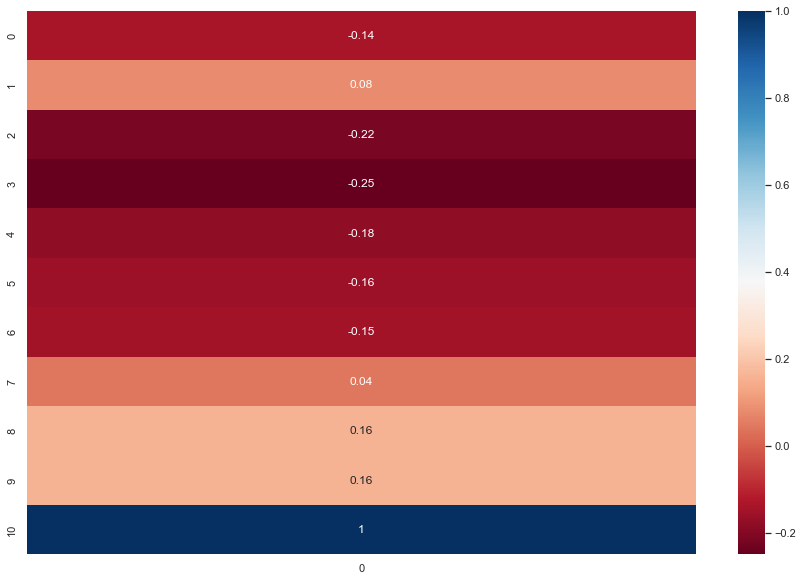

In [25]:
sns.heatmap(data=cor.iloc[-1,:].values.reshape(-1, 1).round(2), annot=True, cmap='RdBu')

<AxesSubplot:>

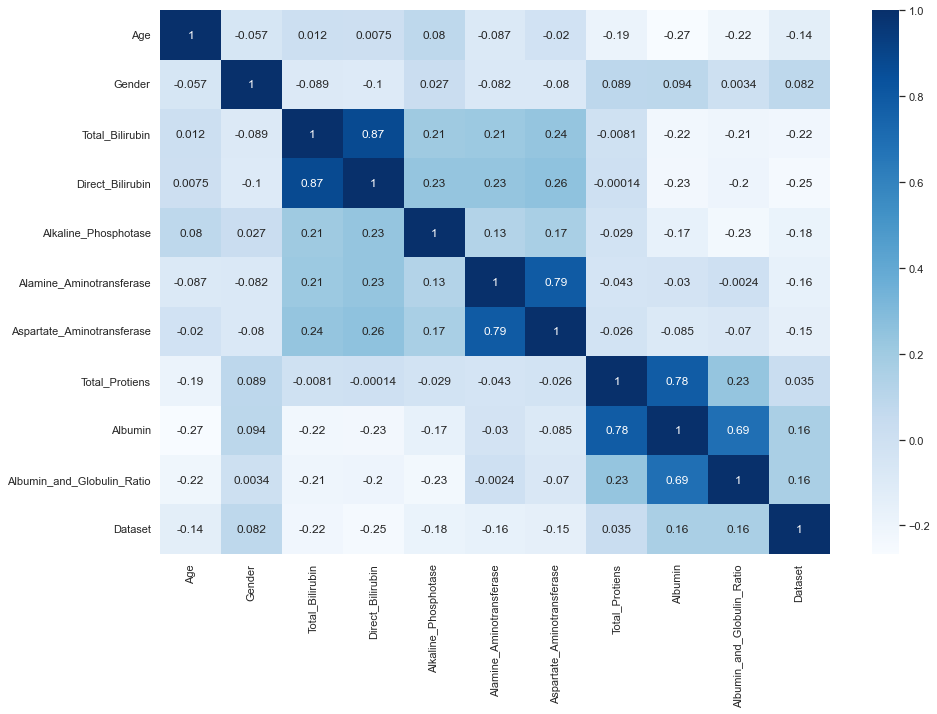

In [26]:
sns.heatmap(data=cor,cbar=True,annot=True,cmap="Blues")

<AxesSubplot:ylabel='Dataset'>

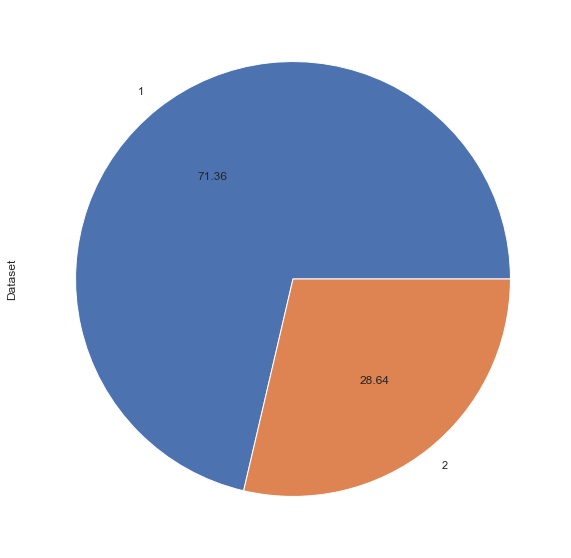

In [27]:
dataset['Dataset'].value_counts().plot.pie(autopct='%.2f')

In [28]:
# another way to label encoder
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes

In [29]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [30]:
# filling the null value 
dataset['Albumin_and_Globulin_Ratio']=dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [31]:
dataset.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [32]:
x=dataset.drop(['Dataset','Direct_Bilirubin'], axis=1)
y=dataset['Dataset']

In [33]:
y.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [34]:
# Here this dataset is also imbalance in dependent variables.
from imblearn.over_sampling import RandomOverSampler

In [35]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)

In [36]:
y_ros.value_counts()

1    416
2    416
Name: Dataset, dtype: int64

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.15,random_state=101)

In [38]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

[12:54:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
**************************************************************************************************************
                   Method Used  Test Accuracy
0          Logistic Regression          0.696
1     Decision Tree Classifier          0.792
2       RandomForestClassifier          0.816
3       Support Vector machine          0.672
4    

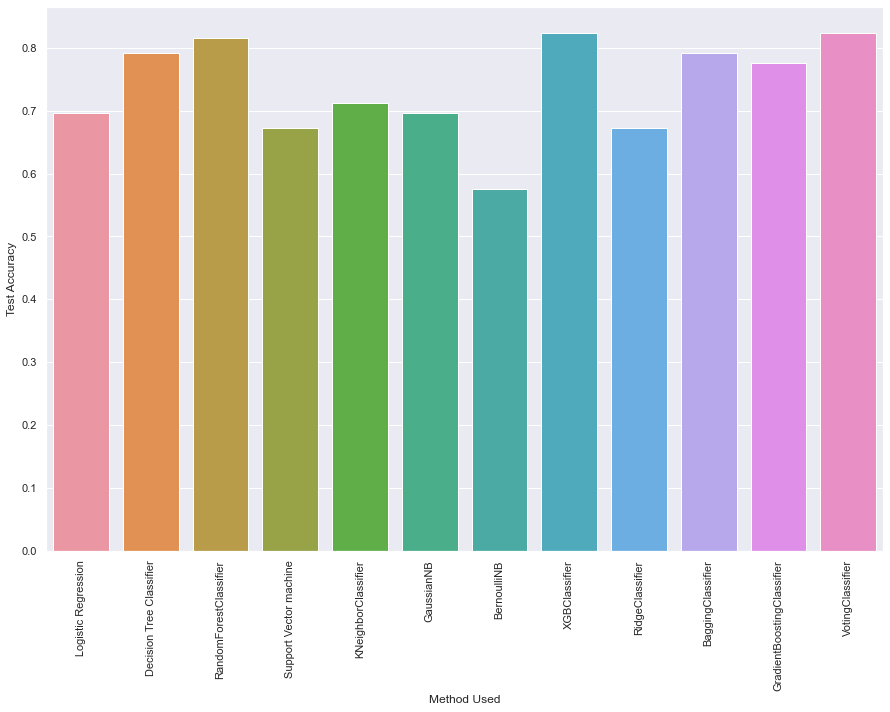

In [39]:
#Model Building 
#**************Logistic Regression************
List=[]
accuracy=[]

lr=LogisticRegression()
logr=lr.fit(x_train,y_train)
pred_lr_test=logr.predict(x_test)
pred_lr_train=logr.predict(x_train)

accuracy_lr_test=accuracy_score(y_test,pred_lr_test)
accuracy_lr_train=accuracy_score(y_train,pred_lr_train)

lr_f1=f1_score(pred_lr_test,y_test)

#************** Decision Tree Classifier **************

dstr=DecisionTreeClassifier()
dcsntre=dstr.fit(x_train,y_train)
pred_dstr_test=dcsntre.predict(x_test)
pred_dstr_train=dcsntre.predict(x_train)

accuracy_dcsntre_test=accuracy_score(y_test,pred_dstr_test)
accuracy_dcsntre_train=accuracy_score(y_train,pred_dstr_train)

dscntre_f1=f1_score(y_test,pred_dstr_test)


#************* RandomForestClassifier **************

rndmfrst=RandomForestClassifier()
rndm=rndmfrst.fit(x_train,y_train)
pred_rndm_test=rndm.predict(x_test)
pred_rndm_train=rndm.predict(x_train)

accuracy_rndmfrst_test= accuracy_score(y_test,pred_rndm_test)
accuracy_rndmfrst_train= accuracy_score(y_train,pred_rndm_train)

rndmfrst_f1=f1_score(y_test,pred_rndm_test)

#*************** Support Vector machine (default kernal= rbf) ************

sprtvcmchn=SVC()
sptvcmn=sprtvcmchn.fit(x_train,y_train)
pred_sprtvcmn_test=sptvcmn.predict(x_test)
pred_sprtvcmn_train=sptvcmn.predict(x_train)

accuracy_sprtvcmn_test=accuracy_score(y_test,pred_sprtvcmn_test)
accuracy_sprtvcmn_train=accuracy_score(y_train,pred_sprtvcmn_train)

svc_f1=f1_score(y_test,pred_sprtvcmn_test)

#****************** KNeighborClassifier ******************

knnclfr=KNeighborsClassifier()
knn=knnclfr.fit(x_train,y_train)
pred_knn_test=knn.predict(x_test)
pred_knn_train=knn.predict(x_train)

accuracy_knn_test=accuracy_score(y_test,pred_knn_test)
accuracy_knn_train=accuracy_score(y_train,pred_knn_train)

knn_f1=f1_score(y_test,pred_knn_test)

#*************** GaussianNB *********************

gnbcls=GaussianNB()
gnb=gnbcls.fit(x_train,y_train)

pred_gnb_test=gnb.predict(x_test)
pred_gnb_train=gnb.predict(x_train)

accuracy_gnb_test=accuracy_score(y_test,pred_gnb_test)
accuracy_gnb_train=accuracy_score(y_train,pred_gnb_train)

gnb_f1=f1_score(y_test,pred_gnb_test)

#***************** BernoulliNB*******************

bnbcls=BernoulliNB()
bnb=bnbcls.fit(x_train,y_train)
pred_bnb_test=bnb.predict(x_test)
pred_bnb_train=bnb.predict(x_train)

accuracy_bnb_test=accuracy_score(y_test,pred_bnb_test)
accuracy_bnb_train=accuracy_score(y_train,pred_bnb_train)

bnb_f1=f1_score(y_test,pred_bnb_test)

#****************XGBClassifier *********************

xgbcls=XGBClassifier()
xgb=xgbcls.fit(x_train,y_train)
pred_xgb_test=xgb.predict(x_test)
pred_xgb_train=xgb.predict(x_train)

accuracy_xgb_test=accuracy_score(y_test,pred_xgb_test)
accuracy_xgb_train=accuracy_score(y_train,pred_xgb_train)

xgb_f1=f1_score(y_test,pred_xgb_test)

#**************** Ridge Classifier ********************

ridg=RidgeClassifier()
rgmodel=ridg.fit(x_train,y_train)
pred_rg_test=rgmodel.predict(x_test)
pred_rg_train=rgmodel.predict(x_train)

accuracy_rg_test=accuracy_score(y_test,pred_rg_test)
accuracy_rg_train=accuracy_score(y_train,pred_rg_train)

rg_f1=f1_score(y_test,pred_rg_test)

#***********************Bagging Classifier *******************

Bagg=BaggingClassifier()
bag=Bagg.fit(x_train,y_train)

pred_bg_test=bag.predict(x_test)
pred_bg_train=bag.predict(x_train)

accuracy_bg_test=accuracy_score(y_test,pred_bg_test)
accuracy_bg_train=accuracy_score(y_train,pred_bg_train)

bg_f1=f1_score(y_test,pred_bg_test)

#******************* Gradient Boosting Classifier **********************

graboo=GradientBoostingClassifier()
gb=graboo.fit(x_train,y_train)

pred_gb_test=gb.predict(x_test)
pred_gb_train=gb.predict(x_train)

accuracy_gb_test=accuracy_score(y_test,pred_gb_test)
accuracy_gb_train=accuracy_score(y_train,pred_gb_train)

gb_f1=f1_score(y_test,pred_gb_test)

#*************VotingClassifier**********************

from sklearn.ensemble import VotingClassifier
evc=VotingClassifier(estimators=[('LR',logr),('DT',dcsntre),('Rndomfrst',rndm),('sprtvcmchn',sptvcmn),('KNNcls',knn),
                                 ('GNBCLS',gnb),('BNBCLS',bnb),('XGBCLS',xgb),('Ridg',rgmodel),('Baggg',bag),('Grabo',gb)],voting='hard',flatten_transform=True)
model_evc=evc.fit(x_train,y_train)
pred_evc_test=model_evc.predict(x_test)
pred_evc_train=model_evc.predict(x_train)

accuracy_evc_test=accuracy_score(y_test,pred_evc_test)
accuracy_evc_train=accuracy_score(y_train,pred_evc_train)

evc_f1=f1_score(y_test,pred_evc_test)


list1=['Logistic Regression','Decision Tree Classifier','RandomForestClassifier','Support Vector machine','KNeighborClassifier',
       'GaussianNB','BernoulliNB','XGBClassifier','RidgeClassifier','BaggingClassifier','GradientBoostingClassifier',
       'VotingClassifier']

listtest=[accuracy_lr_test,accuracy_dcsntre_test,accuracy_rndmfrst_test,accuracy_sprtvcmn_test,accuracy_knn_test,
         accuracy_gnb_test,accuracy_bnb_test,accuracy_xgb_test,accuracy_rg_test,accuracy_bg_test,accuracy_gb_test,accuracy_evc_test]
listtrain=[accuracy_lr_train,accuracy_dcsntre_train,accuracy_rndmfrst_train,accuracy_sprtvcmn_train,accuracy_knn_train,
          accuracy_gnb_train,accuracy_bnb_train,accuracy_xgb_train,accuracy_rg_train,accuracy_bg_train,accuracy_gb_train,accuracy_evc_train]

listinstance=[logr,dcsntre,rndm,sptvcmn,knn,gnb,bnb,xgb,rgmodel,bag,gb,model_evc]

listf1=[lr_f1,dscntre_f1,rndmfrst_f1,svc_f1,knn_f1,gnb_f1,bnb_f1,xgb_f1,rg_f1,bg_f1,gb_f1,evc_f1]


df_testaccuracy = pd.DataFrame({'Method Used' :list1, "Test Accuracy" :listtest})
print('***********'*10)
print(df_testaccuracy)

charts = sns.barplot(x='Method Used', y = 'Test Accuracy', data=df_testaccuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

**************************************************************************************************************
                   Method Used  Train Accuracy
0          Logistic Regression        0.718529
1     Decision Tree Classifier        1.000000
2       RandomForestClassifier        1.000000
3       Support Vector machine        0.660537
4          KNeighborClassifier        0.801980
5                   GaussianNB        0.667610
6                  BernoulliNB        0.537482
7                XGBClassifier        1.000000
8              RidgeClassifier        0.680339
9            BaggingClassifier        0.988685
10  GradientBoostingClassifier        0.916549
11            VotingClassifier        0.930693
AxesSubplot(0.125,0.125;0.775x0.755)


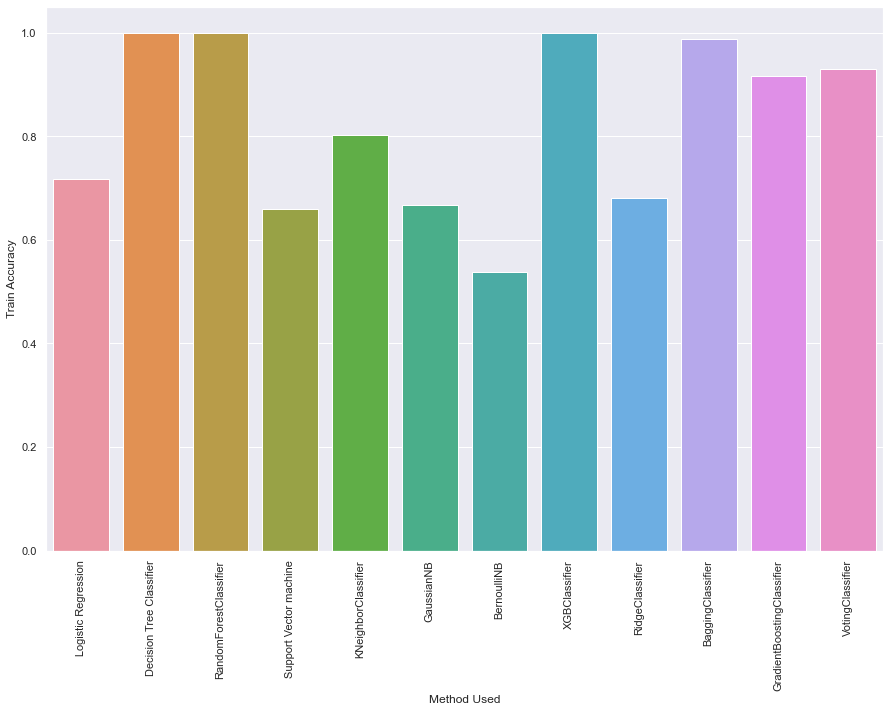

In [40]:
df_trainaccuracy = pd.DataFrame({'Method Used' :list1, "Train Accuracy" :listtrain})
print('***********'*10)
print(df_trainaccuracy)

charts1 = sns.barplot(x='Method Used', y = 'Train Accuracy', data=df_trainaccuracy)
charts1.set_xticklabels(charts1.get_xticklabels(), rotation=90)
print(charts1)

**************************************************************************************************************
                   Method Used  F1_Score
0          Logistic Regression  0.666667
1     Decision Tree Classifier  0.790323
2       RandomForestClassifier  0.806723
3       Support Vector machine  0.601942
4          KNeighborClassifier  0.704918
5                   GaussianNB  0.595745
6                  BernoulliNB  0.658065
7                XGBClassifier  0.819672
8              RidgeClassifier  0.630631
9            BaggingClassifier  0.790323
10  GradientBoostingClassifier  0.766667
11            VotingClassifier  0.803571
AxesSubplot(0.125,0.125;0.775x0.755)


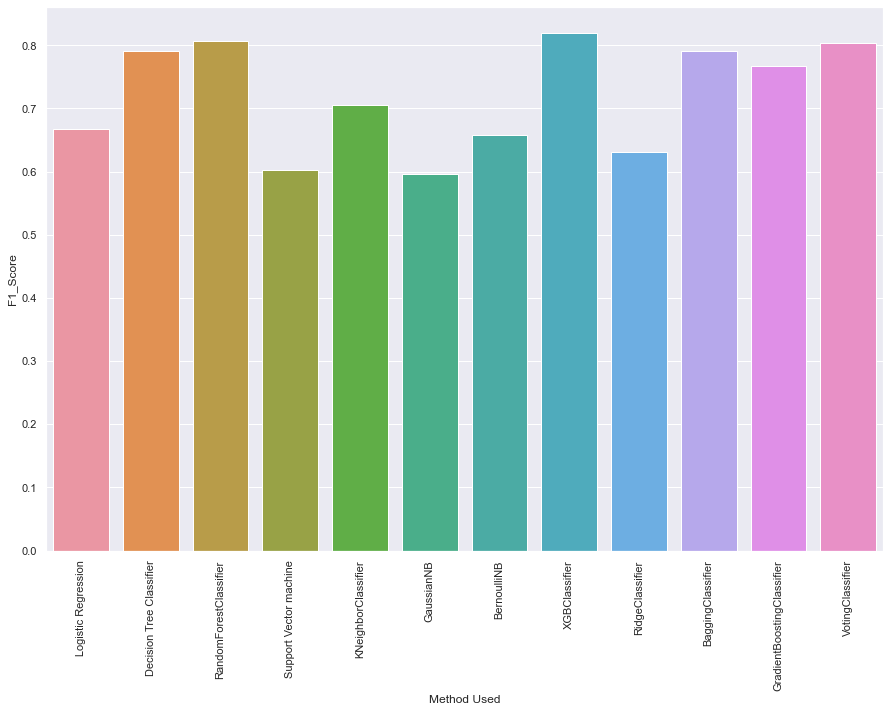

In [41]:
df_f1score = pd.DataFrame({'Method Used' :list1, "F1_Score" :listf1})
print('***********'*10)
print(df_f1score)

charts2 = sns.barplot(x='Method Used', y = 'F1_Score', data=df_f1score)
charts2.set_xticklabels(charts2.get_xticklabels(), rotation=90)
print(charts2)

# Now Run These trained data with Hyperparameter tuning models

<!--  Now Run with Tuned Hyperparameter -->

In [42]:
# grid searching key hyperparametres for *******************logistic regression********************************
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
lr_bestscore=grid_result.best_score_
print(lr_bestscore)
lr_Bestparam=grid_result.best_params_
print(lr_Bestparam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

0.7071696847753185
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [43]:
#************************************************ Decision Tree ***********************************

params={
    'max_depth':[2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100],'criterion':['gini','entropy']}

grid_search=GridSearchCV(estimator=dstr, param_grid=params,cv=4,n_jobs= -1,verbose=1,scoring="accuracy")
grid_search.fit(x_train,y_train)

dstr_best=grid_search.best_score_
print(dstr_best)
dstr_bestparam=grid_search.best_estimator_
print(dstr_bestparam)

# def evaluate_model(dt_classifier):
#     print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
#     print("Train Confusion Matrix:")
#     print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
#     print("-"*50)
#     print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
#     print("Test Confusion Matrix:")
#     print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
0.7496950436569081
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)


In [44]:
#****************Random Forest *******************************
# define models and parameters
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rndmfrst, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
rndmfrsst_best=grid_result.best_score_
print(rndmfrsst_best)
rndmfrst_bestparam=grid_result.best_params_
print(rndmfrst_bestparam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

0.8425285043594902
{'max_features': 'sqrt', 'n_estimators': 10}


In [45]:
#****************************svc*****************************
# define parameters
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=sprtvcmchn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
svc_best=grid_result.best_score_
print(svc_best)
svc_bestparam=grid_result.best_params_
print(svc_bestparam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))
  

0.692541918175721
{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [46]:
#*********************************knn*************************************************
# define models and parameters
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knnclfr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
knn_best=grid_result.best_score_
print(knn_best)
knn_bestParams=grid_result.best_params_
print(knn_bestParams)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))
 

0.8029242119382964
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [47]:
# ******************************** Ridge Classifier ***********************************
# define parameters
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ridg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
ridg_best=grid_result.best_score_
print(ridg_best)
ridg_bestparam=grid_result.best_params_
print(ridg_bestparam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))




0.6765660630449362
{'alpha': 1.0}


In [48]:
# ********************************** Bagging Classifier *********************************
# define parameters
n_estimators = [10, 100]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Bagg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
bag_best=grid_result.best_score_
print(bag_best)
bag_bestParam= grid_result.best_params_
print(bag_bestParam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


0.8363447350771295
{'n_estimators': 10}


In [49]:
#************************ Gradient Boosting Classifier *********************************************
# define parameters
n_estimators = [100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=graboo, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)

# summarize results
graboo_best= grid_result.best_score_
print(graboo_best)
graboo_bestparam= grid_result.best_params_
print(graboo_bestparam)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


0.8519382964453387
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.7}


In [50]:
# **************************** Gaussian NB *************************************************
# define grid search
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gnbcls, param_grid=params_NB, cv=cv_method,verbose=1, scoring='accuracy')
gs_NB.fit(x_train,y_train);

gs_NB_best=gs_NB.best_score_
print(gs_NB_best)
gs_NB_bestparam=gs_NB.best_params_
print(gs_NB_bestparam)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
0.668521293244098
{'var_smoothing': 1.232846739442066e-07}


**************************************************************************************************************
                    Classifiers  Best Score
0           Logistic Regression    0.707170
1      Decision Tree Classifier    0.749695
2      Random Forest Classifier    0.842529
3        Support Vector Machine    0.692542
4         KNeighbors Classifier    0.802924
5              Ridge Classifier    0.676566
6            Bagging Classifier    0.836345
7  Gradient Boosting Classifier    0.851938
8          Gaussian Naive Bayes    0.668521
AxesSubplot(0.125,0.125;0.775x0.755)


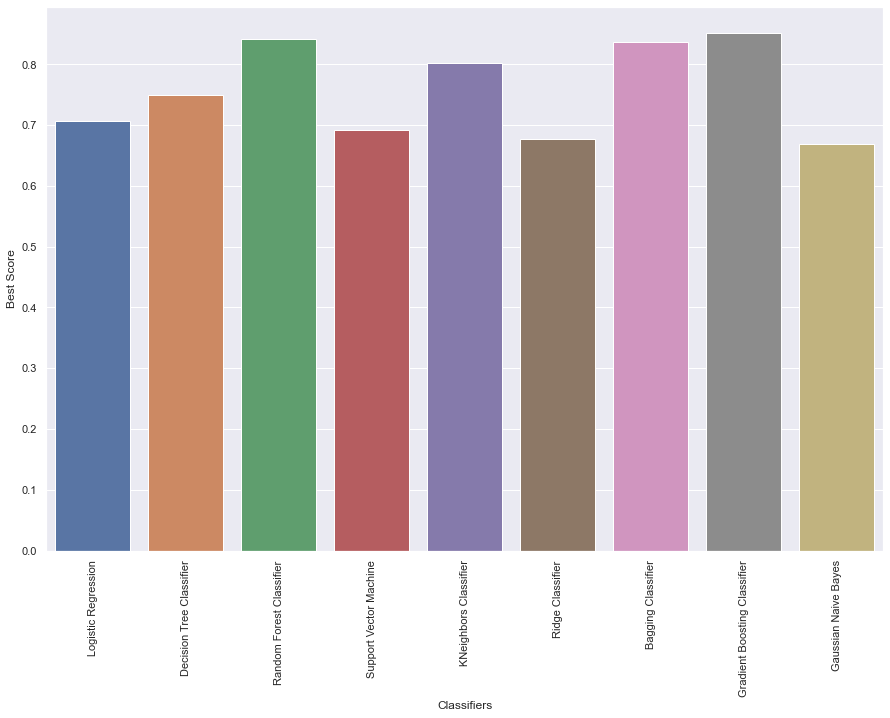

In [51]:
hpcls=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Support Vector Machine','KNeighbors Classifier','Ridge Classifier','Bagging Classifier','Gradient Boosting Classifier','Gaussian Naive Bayes']
bstscr=[lr_bestscore,dstr_best,rndmfrsst_best,svc_best,knn_best,ridg_best,bag_best,graboo_best,gs_NB_best]

df_HpClsBestscore = pd.DataFrame({'Classifiers' :hpcls, "Best Score" :bstscr})
print('***********'*10)
print(df_HpClsBestscore)

chartt = sns.barplot(x='Classifiers', y = 'Best Score', data=df_HpClsBestscore)
chartt.set_xticklabels(chartt.get_xticklabels(), rotation=90)
print(chartt)

Now based on that more accuracy classifier can be picked as final model here..